In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('admission_predict.csv')

In [3]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.columns.unique()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
# Drop obviously useless columns

df.drop(columns='Serial No.',inplace=True)


# EDA

### Checking the names of columns 

In [6]:
df['GRE Score'] #OK

0      337
1      324
2      316
3      322
4      314
      ... 
495    332
496    337
497    330
498    312
499    327
Name: GRE Score, Length: 500, dtype: int64

In [7]:
df['TOEFL Score']

0      118
1      107
2      104
3      110
4      103
      ... 
495    108
496    117
497    120
498    103
499    113
Name: TOEFL Score, Length: 500, dtype: int64

In [8]:
df['University Rating'] #OK

0      4
1      4
2      3
3      3
4      2
      ..
495    5
496    5
497    5
498    4
499    4
Name: University Rating, Length: 500, dtype: int64

In [9]:
df['SOP'] #OK

0      4.5
1      4.0
2      3.0
3      3.5
4      2.0
      ... 
495    4.5
496    5.0
497    4.5
498    4.0
499    4.5
Name: SOP, Length: 500, dtype: float64

In [10]:
df['LOR'] # Have to rename

KeyError: 'LOR'

In [11]:
df[['CGPA','Research']] #ok

,CGPA,Research
0,9.65,1
1,8.87,1
2,8.00,1
3,8.67,1
4,8.21,0
...,...,...
495,9.02,1
496,9.87,1
497,9.56,1
498,8.43,0


In [12]:
df['Chance of Admit'] # have to rename 

KeyError: 'Chance of Admit'

In [13]:
df.rename(columns={'Chance of Admit ':'Chance of Admit','LOR ':'LOR'},inplace=True)

In [14]:
df['LOR']

0      4.5
1      4.5
2      3.5
3      2.5
4      3.0
      ... 
495    4.0
496    5.0
497    5.0
498    5.0
499    4.5
Name: LOR, Length: 500, dtype: float64

In [15]:
df.columns.unique() # column names are fine

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [16]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


### From above we see 
- no missing records
- All features and labels have correct datatypes

## Duplicate values

In [18]:
df.duplicated().sum() # no

0

In [19]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Checking unique values in discrete features

In [20]:
df['SOP'].unique().tolist()
# Is there any way to sort these?

# Basically starts with 1 upto 5 in increments of 0.5

[4.5, 4.0, 3.0, 3.5, 2.0, 5.0, 1.5, 1.0, 2.5]

In [21]:
df['LOR'].unique().tolist()

#  starts with 1 upto 5 in increments of 0.5 ( same as SOP)

[4.5, 3.5, 2.5, 3.0, 4.0, 1.5, 2.0, 5.0, 1.0]

In [22]:
df['University Rating'].unique().tolist()

# Universities are rated on a scale of 1 - 5 

[4, 3, 2, 5, 1]

In [23]:
df['Research'].unique().tolist()

# seems like either yes no encoded 

[1, 0]

In [24]:
discrete_count=['University Rating', 'SOP', 'LOR','Research']

In [25]:
df[discrete_count]

,University Rating,SOP,LOR,Research
0,4,4.5,4.5,1
1,4,4.0,4.5,1
2,3,3.0,3.5,1
3,3,3.5,2.5,1
4,2,2.0,3.0,0
...,...,...,...,...
495,5,4.5,4.0,1
496,5,5.0,5.0,1
497,5,4.5,5.0,1
498,4,4.0,5.0,0


In [26]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [27]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [28]:
continous = ['GRE Score', 'TOEFL Score','CGPA','Chance of Admit']
df[continous]

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65
...,...,...,...,...
495,332,108,9.02,0.87
496,337,117,9.87,0.96
497,330,120,9.56,0.93
498,312,103,8.43,0.73


In [29]:
df[continous].describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


### Checking heatmap to observe any colinearity issues

In [30]:
# Correlation > 0.5 (50%) means correlation problem

<Axes: >

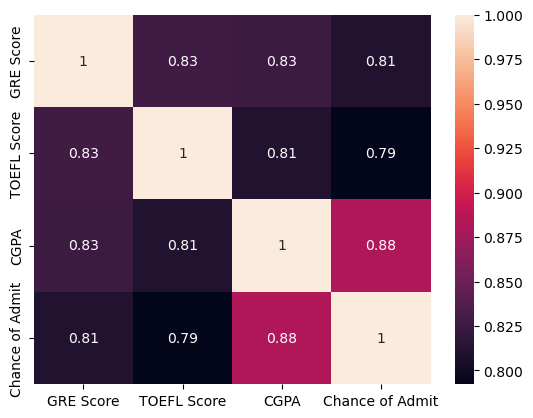

In [31]:
sns.heatmap(df[continous].corr(),annot=True)

<Axes: >

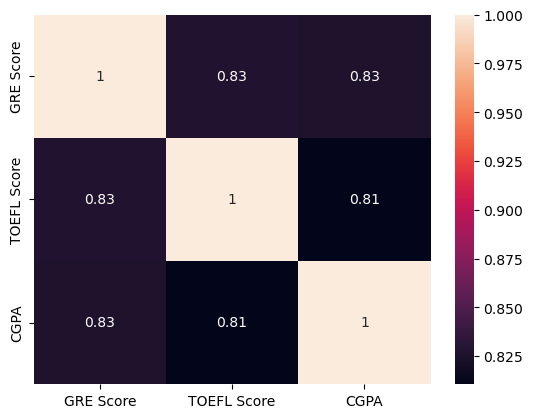

In [32]:
sns.heatmap(df[['GRE Score', 'TOEFL Score','CGPA']].corr(),annot=True)

Note: High corr b/w these 'GRE Score', 'TOEFL Score','CGPA' make sense in real life as a student with high cgpa will score higher in gre and toefl most of the times.

**High correlations**
- (TOEFL , CGPA) = 0.81
- (TOEFL , GRE) = 0.83
- (GRE , CGPA) = 0.83

In these pairs we observe that  (TOEFL , GRE) ,(GRE , CGPA) have highest correlation of 0.83
- In these two pairs GRE is common ,let us drop GRE and build the model

##  Drop GRE

In [33]:
df.drop(columns='GRE Score',inplace=True)

In [34]:
continous.pop(0)

'GRE Score'

In [35]:
continous

['TOEFL Score', 'CGPA', 'Chance of Admit']

In [36]:
df

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,4.5,9.65,1,0.92
1,107,4,4.0,4.5,8.87,1,0.76
2,104,3,3.0,3.5,8.00,1,0.72
3,110,3,3.5,2.5,8.67,1,0.80
4,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
495,108,5,4.5,4.0,9.02,1,0.87
496,117,5,5.0,5.0,9.87,1,0.96
497,120,5,4.5,5.0,9.56,1,0.93
498,103,4,4.0,5.0,8.43,0,0.73


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


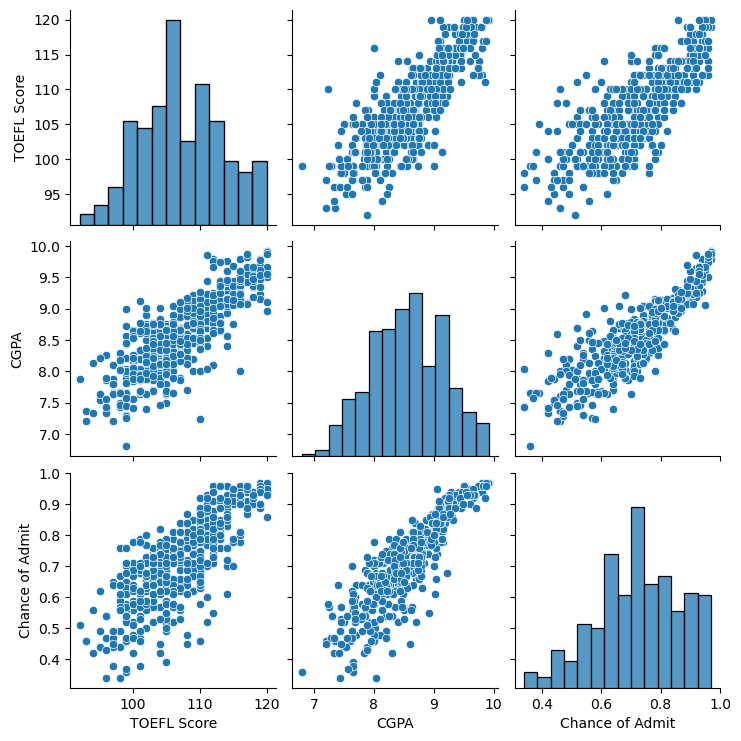

In [37]:
sns.pairplot(df[continous])

In [38]:
df['TOEFL Score'].skew() # No skewness

0.09560097235726285

In [39]:
df['CGPA'].skew() # No skewness

-0.026612517318359303

In [40]:
 df.to_csv('cleaned_data.csv')